# TGP 2 Kelompok 12



1. Anugra Salaza			(5026201003)
2. Nadila Nur Sholekah		(5026211041)
3. Maharani Putri Efendi		(5026211095)



# Prerequisites (Importing Dependables)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import SequentialFeatureSelector

# Data Preparation

In [ ]:
tgp = pd.read_csv('Data utk TGP #1.csv', delimiter = ';')
tgp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
tgp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Cek Missing value

In [ ]:
# Cek apakah terdapat baris yang kosong
tgp.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
#melakukan pengecekan apakah terdapat baris duplikat
tgp.duplicated().sum()

0

##Pengecekan Tiap Kolom

In [ ]:
#melakukan pengecekan pada kolom contact
tgp['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom job
tgp['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom age
tgp['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom marital
tgp['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom education
tgp['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom default
tgp['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom housing
tgp['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom subscribe
tgp['subscribe'].value_counts()

no     39922
yes     5289
Name: subscribe, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom loan
tgp['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom month
tgp['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom day
tgp['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom poutcome
tgp['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom pdays
tgp['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [ ]:
#melakukan pengecekan pada kolom previous
tgp['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [ ]:
tgp1 = tgp.copy()

In [ ]:
tgp1.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


##Pengecekan Outlier

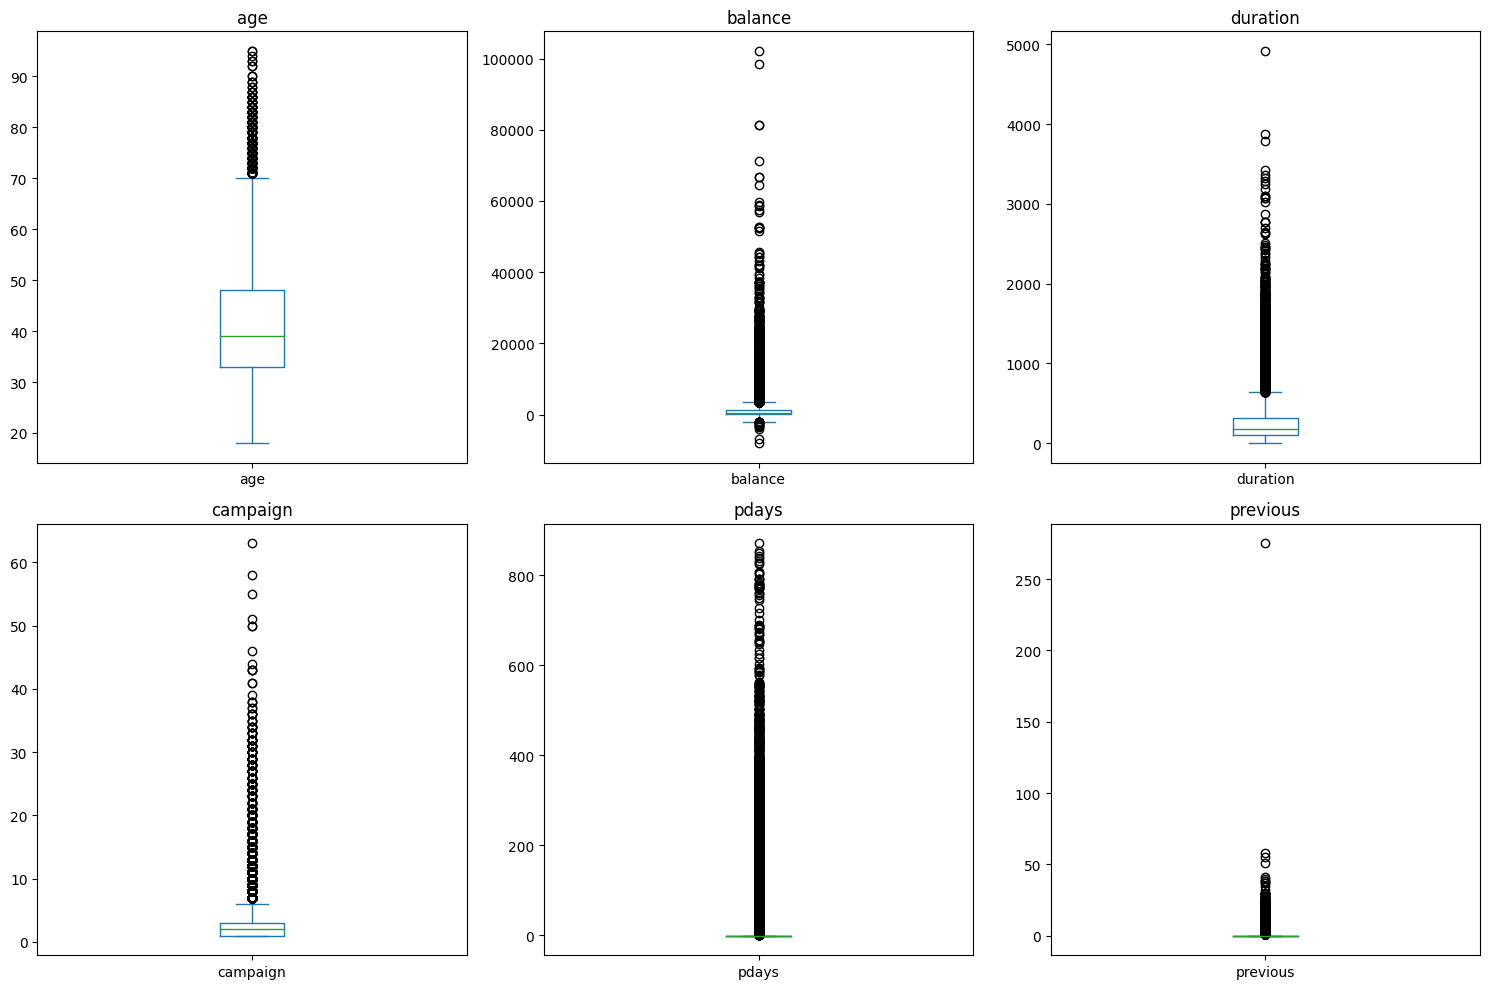

In [ ]:
ratio_data = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    tgp1[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


In [ ]:
tgp1_mean = tgp1.balance.mean()
tgp1_stdev = tgp1.balance.std()
print("Balance rata-rata: {0}\nBalance Standard Deviasi: {1}".format(tgp1_mean, tgp1_stdev))

Balance rata-rata: 1362.2720576850766
Balance Standard Deviasi: 3044.765829168518


In [ ]:
# define our treshold value for z-score
threshold = 1 # this means: we only want to tolerate values within ** 1 std. ** from the central value (mean)

In [ ]:
outlier = []
for i in tgp1['balance']:
    z = (i-tgp1_mean)/tgp1_stdev
    if abs(z) < threshold:
        outlier.append(i)
print('Our outlier value in tgp is', outlier)

Our outlier value in tgp is [2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71, 162, 229, 13, 52, 60, 0, 723, 779, 23, 50, 0, -372, 255, 113, -246, 265, 839, 378, 39, 0, 63, -7, -3, 506, 0, 2586, 49, 104, 529, 96, -171, -364, 0, 0, 0, 1291, -244, 0, -76, -103, 243, 424, 306, 24, 179, 0, 989, 249, 790, 154, 100, 59, 1205, 25, 282, 23, 1937, 384, 582, 91, 0, 1, 206, 164, 690, 2343, 137, 173, 45, 1270, 16, 486, 50, 152, 290, 54, -37, 101, 383, 81, 0, 229, -674, 90, 128, 179, 0, 54, 151, 61, 30, 523, 31, 79, -34, 448, 81, 144, 351, -67, 262, 0, 56, 26, 3, 41, 7, 105, 818, -16, 0, 2476, 1185, 217, 1685, 802, 0, 94, 0, 0, 517, 265, 947, 3, 42, 37, 57, 22, 8, 293, 3, 348, -19, 0, -4, 18, 139, 0, 1883, 216, 782, 904, 1705, 47, 176, 1225, 86, 82, 271, 1378, 184, 0, 0, 1357, 19, 434, 92, 1151, 41, 51, 214, 1161, 37, 787, 59, 253, 211, 235, 4384, 4080, 53, 0, 2127, 377, 73, 445, 243, 307, 155, 173, 400, 1428, 219, 7, 575, 298, 0, 176, 517, 257, 56, -390, 330, 195, 301, -41, 483, 28, 13

In [ ]:
from scipy import stats
tgp1['z_score']= stats.zscore(tgp1['balance'])
#tgp1

In [ ]:
tgp1 = tgp1.loc[tgp1['z_score'].abs() < threshold]
tgp1 = tgp1.reset_index(drop = True)
tgp1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe,z_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.256419
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,-0.437895
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,-0.446762
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.047205
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,-0.447091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41731,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,-0.281559
41732,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,-0.176460
41733,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0.120447
41734,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,-0.228024


##Penghapusan Outlier (z_score)

In [ ]:
# Hitung mean dan standar deviasi dari 'z_score'
mean_z_score = tgp1['z_score'].mean()
std_z_score = tgp1['z_score'].std()

# Tentukan batas atas dan batas bawah untuk outlier
threshold = 3  # Threshold z-score untuk outlier
lower_bound = mean_z_score - threshold * std_z_score
upper_bound = mean_z_score + threshold * std_z_score

# List kolom-kolom yang ingin diberikan outlier treatment
ratio_data = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Buang outlier
for data in ratio_data:
  tgp1 = tgp1[(tgp1['z_score'] >= lower_bound) & (tgp1['z_score'] <= upper_bound)]

# Informasi DataFrame setelah menghapus outlier
tgp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40928 entries, 0 to 41735
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40928 non-null  int64  
 1   job        40928 non-null  object 
 2   marital    40928 non-null  object 
 3   education  40928 non-null  object 
 4   default    40928 non-null  object 
 5   balance    40928 non-null  int64  
 6   housing    40928 non-null  object 
 7   loan       40928 non-null  object 
 8   contact    40928 non-null  object 
 9   day        40928 non-null  int64  
 10  month      40928 non-null  object 
 11  duration   40928 non-null  int64  
 12  campaign   40928 non-null  int64  
 13  pdays      40928 non-null  int64  
 14  previous   40928 non-null  int64  
 15  poutcome   40928 non-null  object 
 16  subscribe  40928 non-null  object 
 17  z_score    40928 non-null  float64
dtypes: float64(1), int64(7), object(10)
memory usage: 5.9+ MB


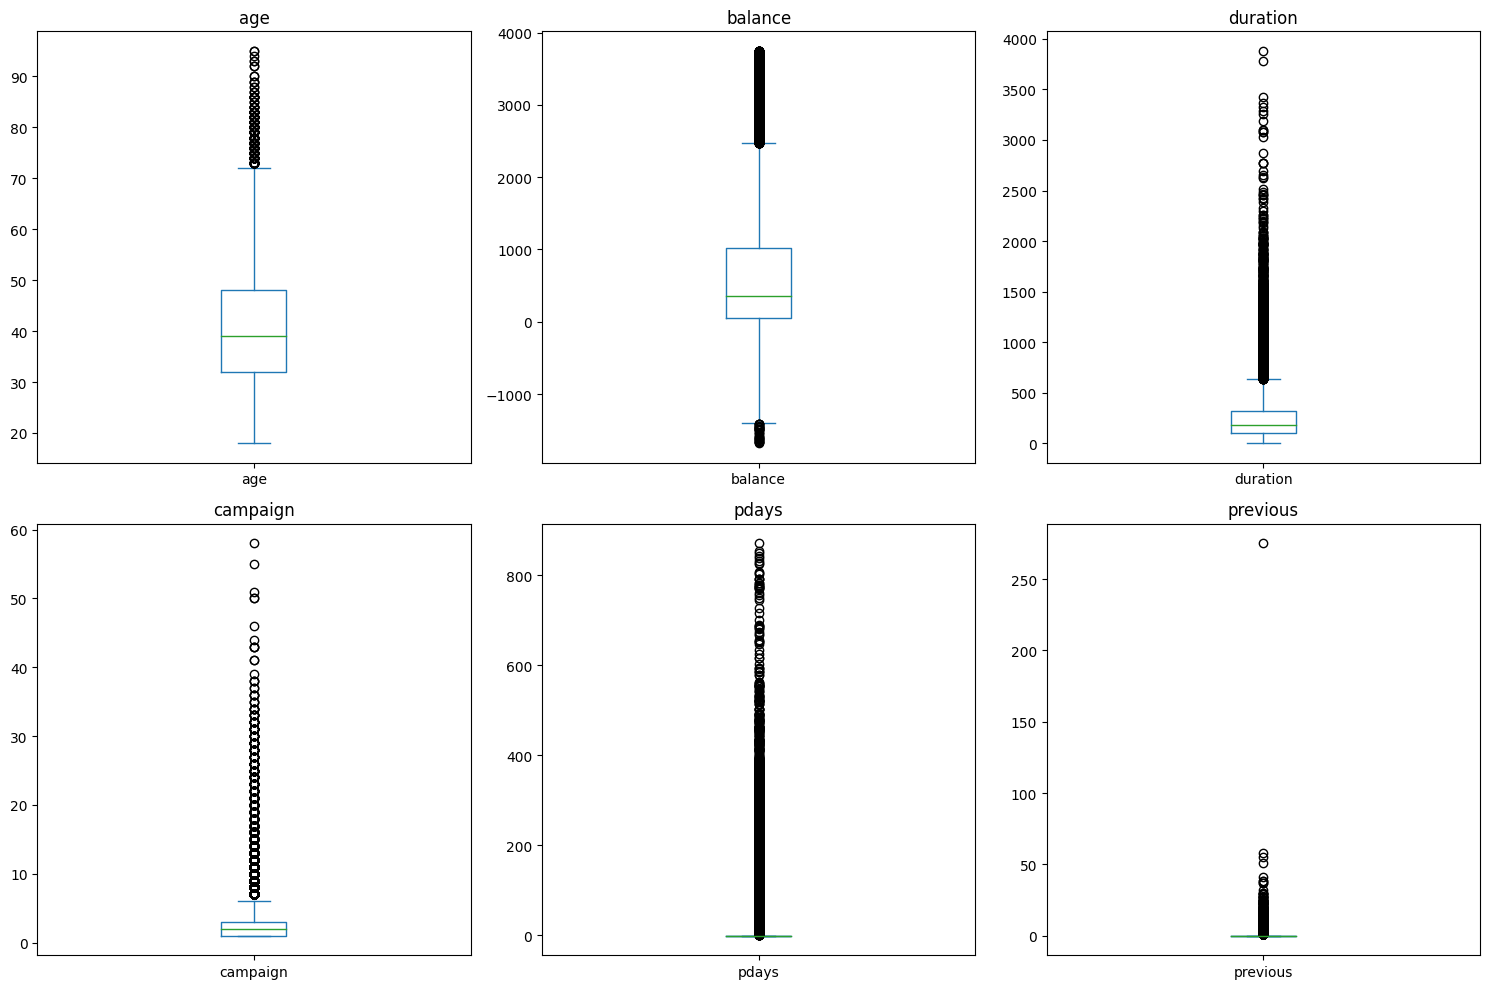

In [ ]:
ratio_data = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Membuat satu gambar dengan subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterasi melalui kolom-kolom yang akan diplot
for i, data in enumerate(ratio_data):
    # Menentukan subplot yang sesuai
    row = i // 3
    col = i % 3

    # Membuat boxplot dalam subplot
    tgp1[data].plot(kind='box', ax=axes[row, col])
    axes[row, col].set_title(data)

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()


In [ ]:
tgp1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe,z_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.256419
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,-0.437895
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,-0.446762
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.047205
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,-0.447091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41731,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,-0.281559
41732,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,-0.176460
41733,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0.120447
41734,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,-0.228024


In [ ]:
tgp1['job'].value_counts()

blue-collar      9043
management       8222
technician       6923
admin.           4792
services         3866
retired          1952
self-employed    1401
entrepreneur     1348
unemployed       1166
housemaid        1112
student           853
unknown           250
Name: job, dtype: int64

In [ ]:
tgp1['contact'].value_counts()

cellular     26432
unknown      11960
telephone     2536
Name: contact, dtype: int64

In [ ]:
tgp1['education'].value_counts()

secondary    21414
tertiary     11615
primary       6246
unknown       1653
Name: education, dtype: int64

In [ ]:
tgp1['poutcome'].value_counts()

unknown    33573
failure     4381
other       1660
success     1314
Name: poutcome, dtype: int64

## Categorical Encoding

In [ ]:
tgp1['job'] = tgp1['job'].replace('unknown', 0)
tgp1['education'] = tgp1['education'].replace('unknown', 0)
tgp1['contact'] = tgp1['contact'].replace('unknown', 0)
tgp1['poutcome'] = tgp1['poutcome'].replace('unknown', 0)
tgp1= tgp1.replace(
    {'month' : {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12}})
tgp1_encoded = tgp1.copy()

cat_columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'subscribe', 'poutcome']
for col in cat_columns:
    tgp1_encoded[col] = tgp1_encoded[col].astype('category').cat.codes

tgp1_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe,z_score
0,58,5,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0,0.256419
1,44,10,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0,-0.437895
2,33,3,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0,-0.446762
3,47,2,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0,0.047205
4,33,0,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0,-0.447091


In [ ]:
tgp1_encoded.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe,z_score
count,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000,40928.000000
mean,40.655590,5.244820,1.168173,2.050406,0.019595,674.787847,0.563526,0.168418,0.769742,15.769156,6.071003,256.486611,2.774287,40.315847,0.569292,0.284475,0.112906,-0.225795
std,10.477722,3.276646,0.611171,0.771639,0.138607,894.921208,0.495954,0.374241,0.548791,8.360902,2.358346,255.672262,3.117818,101.064131,2.314908,0.690876,0.316481,0.293924
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1680.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.999192
25%,32.000000,2.000000,1.000000,2.000000,0.000000,48.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.431654
50%,39.000000,5.000000,1.000000,2.000000,0.000000,358.000000,1.000000,0.000000,1.000000,16.000000,6.000000,179.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,-0.329839
75%,48.000000,8.000000,2.000000,3.000000,0.000000,1017.000000,1.000000,0.000000,1.000000,21.000000,7.000000,317.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,-0.113400
max,95.000000,11.000000,2.000000,3.000000,1.000000,3745.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,58.000000,871.000000,275.000000,3.000000,1.000000,0.782574


In [ ]:
tgp1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40928 entries, 0 to 41735
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40928 non-null  int64  
 1   job        40928 non-null  int8   
 2   marital    40928 non-null  int8   
 3   education  40928 non-null  int8   
 4   default    40928 non-null  int8   
 5   balance    40928 non-null  int64  
 6   housing    40928 non-null  int8   
 7   loan       40928 non-null  int8   
 8   contact    40928 non-null  int8   
 9   day        40928 non-null  int64  
 10  month      40928 non-null  int64  
 11  duration   40928 non-null  int64  
 12  campaign   40928 non-null  int64  
 13  pdays      40928 non-null  int64  
 14  previous   40928 non-null  int64  
 15  poutcome   40928 non-null  int8   
 16  subscribe  40928 non-null  int8   
 17  z_score    40928 non-null  float64
dtypes: float64(1), int64(8), int8(9)
memory usage: 3.5 MB


# Analisis Univariat

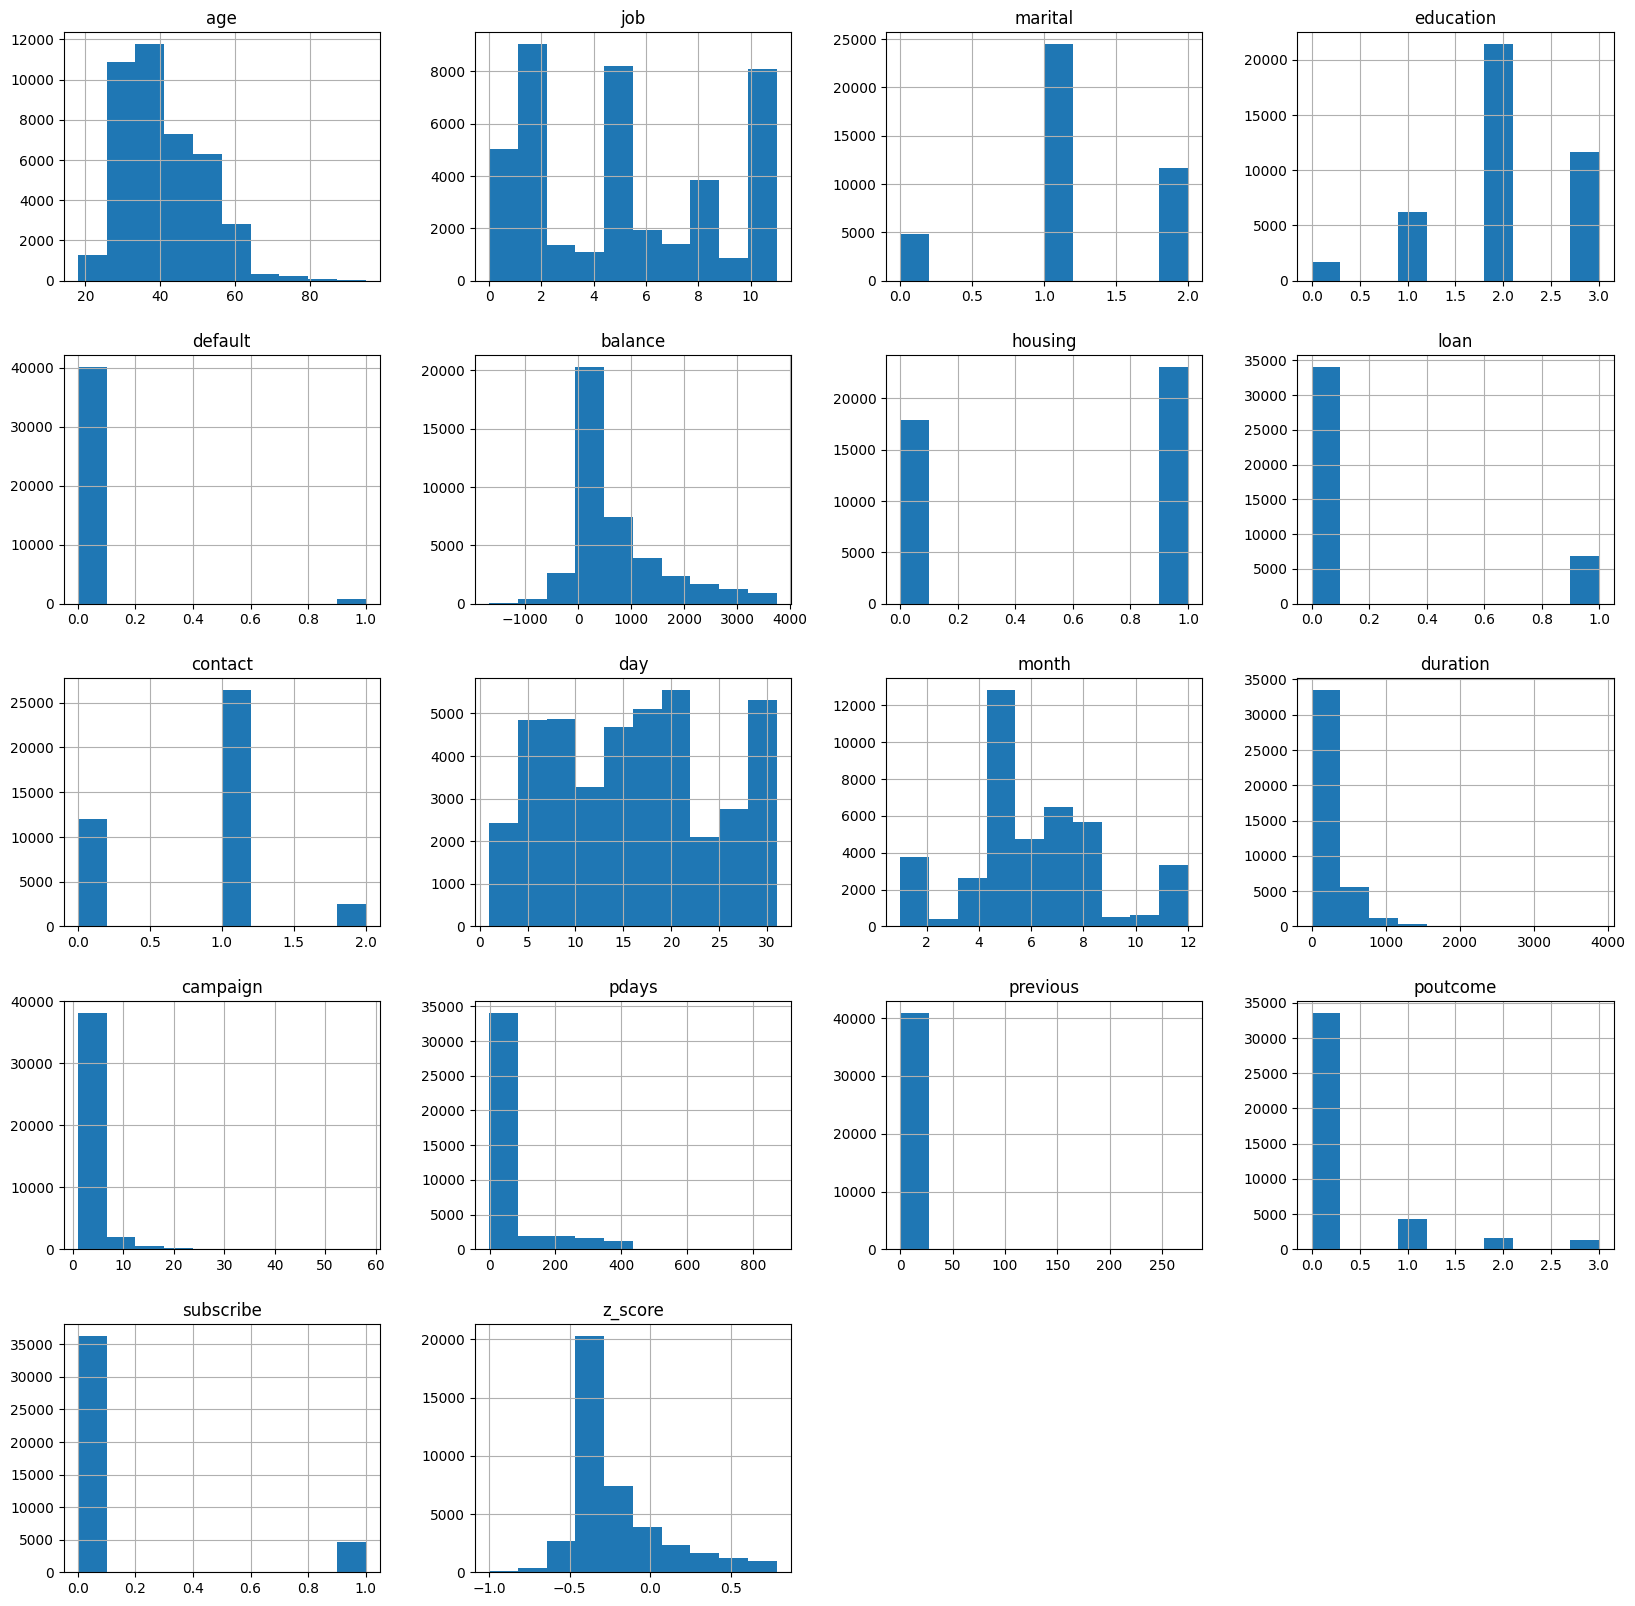

In [ ]:
tgp1_encoded.hist(figsize=(20, 20))
plt.show()

# Analisa Bivariat

In [ ]:
Plot Array
from pandas.plotting import scatter_matrix
scatter_matrix(tgp1, figsize = (15,15))
plt.show()

In [ ]:
sns.pairplot(data = tgp1_encoded, hue = 'subscribe')

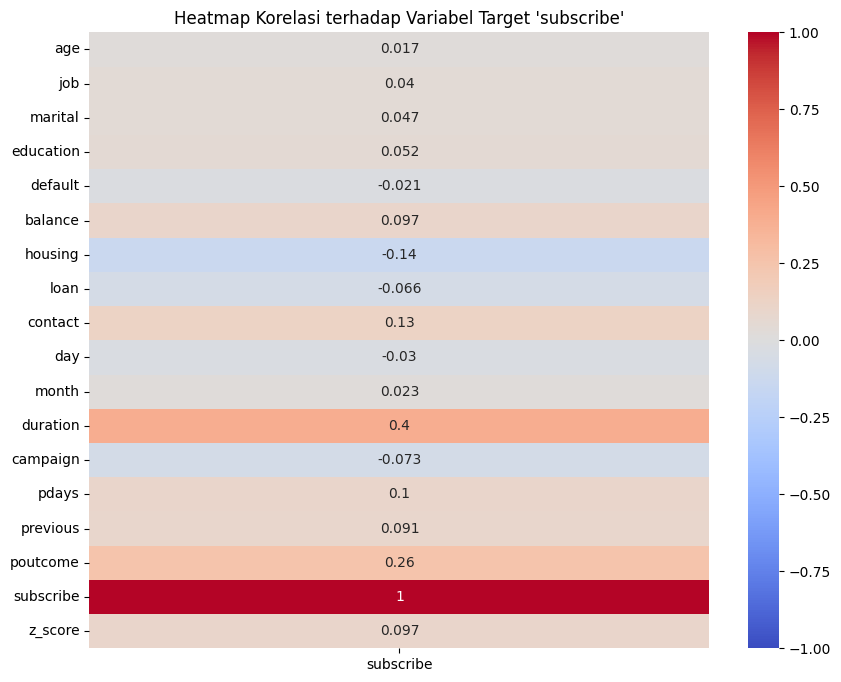

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = tgp1_encoded.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap korelasi terhadap variabel target 'subscribe'
sns.heatmap(correlation_matrix[['subscribe']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Menambahkan judul
plt.title("Heatmap Korelasi terhadap Variabel Target 'subscribe'")

# Menampilkan heatmap
plt.show()

In [ ]:
correlation_matrix = tgp1_encoded.corr()
correlation_with_target = correlation_matrix['subscribe'].sort_values(ascending=False)
print(correlation_with_target)

subscribe    1.000000
duration     0.395398
poutcome     0.256847
contact      0.125068
pdays        0.100885
balance      0.096806
z_score      0.096806
previous     0.091225
education    0.052435
marital      0.046849
job          0.040449
month        0.023240
age          0.016782
default     -0.021473
day         -0.029690
loan        -0.066274
campaign    -0.072603
housing     -0.136841
Name: subscribe, dtype: float64


In [ ]:
tgp1_encoded = tgp1_encoded.drop(['z_score'], axis = 1)

In [ ]:
tgp2 = tgp1_encoded.copy()

# Data Balancing

In [ ]:
tgp2['subscribe'].value_counts()

0    36307
1     4621
Name: subscribe, dtype: int64

In [ ]:
X = tgp2.drop('subscribe', axis=1)
y = tgp2['subscribe']

In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

0    36307
1    36307
Name: subscribe, dtype: int64

# Data Splitting

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=123, stratify=y_balanced)

# Feature Scaling

In [ ]:
X_balanced.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000,72614.000000
mean,40.833737,5.404440,1.203694,2.101537,0.015906,777.853747,0.479880,0.138376,0.853857,15.487316,6.141846,379.125857,2.495910,52.806442,0.837566,0.502190
std,11.736879,3.246306,0.631355,0.782720,0.125113,946.454640,0.499598,0.345296,0.501786,8.438070,2.523335,353.685735,2.688856,110.177944,2.481111,0.967096
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1680.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,2.000000,1.000000,2.000000,0.000000,91.000000,0.000000,0.000000,1.000000,8.000000,5.000000,143.000000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,5.000000,1.000000,2.000000,0.000000,438.000000,0.000000,0.000000,1.000000,15.000000,6.000000,259.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,8.000000,2.000000,3.000000,0.000000,1190.000000,1.000000,0.000000,1.000000,22.000000,8.000000,506.000000,3.000000,55.000000,1.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,3745.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,58.000000,871.000000,275.000000,3.000000


In [ ]:
scaler = StandardScaler()

X_train['balance'] = scaler.fit_transform(X_train[['balance']]) # "fit" on the TRAIN set only, then transform
X_test['balance'] = scaler.transform(X_test[['balance']]) # while on the TEST set, just "transform" it

X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

X_train['campaign'] = scaler.fit_transform(X_train[['campaign']])
X_test['campaign'] = scaler.transform(X_test[['campaign']])

X_train['pdays'] = scaler.fit_transform(X_train[['pdays']])
X_test['pdays'] = scaler.transform(X_test[['pdays']])

X_train['previous'] = scaler.fit_transform(X_train[['previous']])
X_test['previous'] = scaler.transform(X_test[['previous']])

X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000
mean,9.939127e-17,5.412009,1.206772,2.104389,0.016054,7.758390e-18,0.480474,0.139409,0.855004,15.543745,6.137441,5.025480e-17,-5.116344e-17,1.817281e-17,7.339018e-18,0.504023
std,1.000010e+00,3.243101,0.630799,0.782372,0.125684,1.000010e+00,0.499623,0.346376,0.501029,8.445344,2.523689,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.967262
min,-1.943775e+00,0.000000,0.000000,0.000000,0.000000,-2.601163e+00,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785e+00,-5.586701e-01,-4.898221e-01,-3.262762e-01,0.000000
25%,-7.511794e-01,2.000000,1.000000,2.000000,0.000000,-7.266455e-01,0.000000,0.000000,1.000000,8.000000,5.000000,-6.683273e-01,-5.586701e-01,-4.898221e-01,-3.262762e-01,0.000000
50%,-2.400672e-01,5.000000,1.000000,2.000000,0.000000,-3.553387e-01,0.000000,0.000000,1.000000,15.000000,6.000000,-3.402357e-01,-1.828444e-01,-4.898221e-01,-3.262762e-01,0.000000
75%,6.117864e-01,8.000000,2.000000,3.000000,0.000000,4.412256e-01,1.000000,0.000000,1.000000,22.000000,8.000000,3.555449e-01,1.929814e-01,6.270414e-02,5.540185e-02,1.000000
max,4.615499e+00,11.000000,2.000000,3.000000,1.000000,3.137696e+00,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144e+00,1.973592e+01,7.254603e+00,1.046352e+02,3.000000


# Model Klasifikasi

## Logistic Regression

In [ ]:
# param_distributions = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variasi parameter C
#     'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Variasi solver
# }

# # Membuat objek model Regresi Logistik
# logreg = LogisticRegression(random_state=123)

# # Membuat objek RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_distributions, cv=5, scoring='accuracy', verbose=1)

# # Melatih model dengan parameter terbaik
# random_search.fit(X_train, y_train)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", random_search.best_params_)


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression(C=0.01, solver='newton-cg'))])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.9064256  0.90300513 0.90789152 0.89567554 0.9076472  0.89958466
 0.89738578 0.90202785 0.90273705 0.90542522]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.8347516326934494
ROC-AUC score for fold 1:  0.8357258041293518 

F1-score for fold 2:  0.8293549023476031
ROC-AUC score for fold 2:  0.8298243968081604 

F1-score for fold 3:  0.8356601515755884
ROC-AUC score for fold 3:  0.8378883710762689 

F1-score for fold 4:  0.8380380380380381
ROC-AUC score for fold 4:  0.8408386489889959 

F1-score for fold 5:  0.8383114297092792
ROC-AUC score for fold 5:  0.8402542132783175 

F1-score for fold 6:  0.8319144723817067
ROC-AUC score for fold 6:  0.832973924723442 

F1-score for fold 7:  0.8325377883850437
ROC-AUC score for fold 7:  0.8343519544613887 

F1-score for fold 8:  0.8375552874949739
ROC-AUC score for fold 8:  0.8410430079659749 

F1-score for fold 9:  0.836421597927874
ROC-AUC score for fold 9:  0.838483721414127 

F1-score for fold 10:  0.8370517928286851
ROC-AUC score for fold 10:  0.8390397481306573 



Kita akan mengambil salah satu fold yang memiliki performa terbaik untuk digunakan lebih lanjut.

In [ ]:
kfold_set.loc[5]

train    [0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16...
val      [7, 10, 11, 17, 28, 38, 46, 61, 64, 69, 76, 78...
Name: 5, dtype: object

Berikut ini  ringkasan statistik

In [ ]:
X_train.iloc[kfold_set['train'].loc[5]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,0.001279,5.414878,1.206554,2.103725,0.015717,0.000841,0.480086,0.139138,0.856250,15.553098,6.137979,-0.002475,-0.002021,0.001032,-0.000265,0.504306
std,1.002336,3.246526,0.631336,0.781925,0.124381,1.001955,0.499609,0.346094,0.500359,8.447599,2.525459,0.999804,0.994278,1.002124,1.006040,0.967588
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.726646,0.000000,0.000000,1.000000,8.000000,5.000000,-0.671156,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.355868,0.000000,0.000000,1.000000,15.000000,6.000000,-0.343064,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.439903,1.000000,0.000000,1.000000,22.000000,8.000000,0.352717,0.192981,0.062704,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.137696,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


Kemudian dilakukan prediksi pada fold yang memiliki performa terbaik

In [ ]:
X_fold_5 = X_train.iloc[kfold_set['train'].loc[5]]
y_fold_5 = y_train.iloc[kfold_set['train'].loc[5]]
logreg = LogisticRegression(C=0.01, solver='newton-cg')
logreg.fit(X_fold_5, y_fold_5)
y_pred = logreg.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.8072850487081745


## Decision Tree

In [ ]:
# # Membuat model Decision Tree
# dtree = DecisionTreeClassifier()

# # Definisikan kumpulan parameter yang akan diuji
# param_grid = {
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Inisialisasi Grid Search dengan model dan parameter grid
# grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# # Latih Grid Search pada data pelatihan
# grid_search.fit(X_train, y_train)

# # Cetak parameter terbaik yang ditemukan
# print("Parameter terbaik:", grid_search.best_params_)


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', DecisionTreeClassifier(min_samples_leaf= 2, max_depth= 5, min_samples_split =2))])
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=strat_kfold)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


Hasil Akurasi validasi silang:
[0.90105057 0.9076472  0.9064256  0.89934034 0.90495969 0.90398241
 0.90202785 0.90935744 0.90493646 0.90762463]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in strat_kfold.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.8230243902439024
ROC-AUC score for fold 1:  0.8215637270247097 

F1-score for fold 2:  0.8169730152522486
ROC-AUC score for fold 2:  0.8158580089057165 

F1-score for fold 3:  0.8180023687327279
ROC-AUC score for fold 3:  0.8186104301725502 

F1-score for fold 4:  0.8164318317126413
ROC-AUC score for fold 4:  0.8180191824959724 

F1-score for fold 5:  0.8221050576059363
ROC-AUC score for fold 5:  0.820773693797798 

F1-score for fold 6:  0.8141139365267102
ROC-AUC score for fold 6:  0.8144800565764732 

F1-score for fold 7:  0.817011314865392
ROC-AUC score for fold 7:  0.8154616763443028 

F1-score for fold 8:  0.8185822987585103
ROC-AUC score for fold 8:  0.8217622803489337 

F1-score for fold 9:  0.8212050078247262
ROC-AUC score for fold 9:  0.8201838394778813 

F1-score for fold 10:  0.8176643768400393
ROC-AUC score for fold 10:  0.8171979535615899 



In [ ]:
kfold_set.loc[1]

train    [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 1...
val      [0, 6, 12, 21, 22, 26, 44, 51, 52, 56, 62, 63,...
Name: 1, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[1]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,0.001372,5.411533,1.206991,2.102916,0.016067,-0.001938,0.482097,0.138810,0.854326,15.556836,6.139619,-0.000079,0.001265,-0.002221,-0.000474,0.502099
std,1.001370,3.240417,0.629736,0.782410,0.125735,0.998718,0.499685,0.345752,0.501288,8.439779,2.522351,1.000463,1.007794,0.998788,1.017766,0.965582
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.725588,0.000000,0.000000,1.000000,8.000000,5.000000,-0.668327,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.358512,0.000000,0.000000,1.000000,15.000000,6.000000,-0.340236,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.436994,1.000000,0.000000,1.000000,22.000000,8.000000,0.352717,0.192981,0.035531,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.135581,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


In [ ]:
X_fold_1 = X_train.iloc[kfold_set['train'].loc[1]]
y_fold_1 = y_train.iloc[kfold_set['train'].loc[1]]
decision_tree = DecisionTreeClassifier(min_samples_leaf= 2, max_depth= 5, min_samples_split =2)
decision_tree.fit(X_fold_1, y_fold_1)
y_pred = decision_tree.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.8250033800531795


## Random Forest

In [ ]:
# # Tentukan rentang parameter
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

# # Inisialisasi model
# rf = RandomForestClassifier(random_state=123)

# # Inisialisasi Randomized Search
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=123, n_jobs=-1)

# # Lakukan pencarian parameter terbaik
# random_search.fit(X_train, y_train)

# # Parameter terbaik
# best_params = random_search.best_params_
# print("Parameter Terbaik:", best_params)

# # Model dengan parameter terbaik
# best_model = random_search.best_estimator_


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, min_samples_split = 20, min_samples_leaf = 8, max_depth = 10))])
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=strat_kfold)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)


Hasil Akurasi validasi silang:
[0.89934034 0.8988517  0.90227217 0.90080625 0.90105057 0.90153921
 0.90178353 0.89958466 0.89687195 0.90151515]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in strat_kfold.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.8787478785593061
ROC-AUC score for fold 1:  0.8735084503985155 

F1-score for fold 2:  0.873446327683616
ROC-AUC score for fold 2:  0.8678034289578529 

F1-score for fold 3:  0.8770600492517522
ROC-AUC score for fold 3:  0.8723271161759111 

F1-score for fold 4:  0.8856327307326356
ROC-AUC score for fold 4:  0.8817694298167799 

F1-score for fold 5:  0.880301602262017
ROC-AUC score for fold 5:  0.8750652168326154 

F1-score for fold 6:  0.869891263592051
ROC-AUC score for fold 6:  0.863456775444473 

F1-score for fold 7:  0.8780579601053818
ROC-AUC score for fold 7:  0.8725073236374288 

F1-score for fold 8:  0.8860133206470028
ROC-AUC score for fold 8:  0.8821495839591826 

F1-score for fold 9:  0.8708097928436912
ROC-AUC score for fold 9:  0.8650315781064655 

F1-score for fold 10:  0.8800904977375567
ROC-AUC score for fold 10:  0.8748524203069659 



In [ ]:
kfold_set.loc[4]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [14, 19, 32, 36, 42, 45, 48, 60, 65, 66, 74, 8...
Name: 4, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[4]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,-0.001313,5.411337,1.207450,2.105080,0.015958,0.000311,0.479561,0.139859,0.855703,15.519215,6.136515,-0.000832,0.000123,0.000801,0.001487,0.506143
std,0.998386,3.244713,0.630817,0.782806,0.125313,0.999720,0.499588,0.346845,0.500792,8.447045,2.526538,0.995243,1.002521,1.001207,1.017238,0.969496
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.726646,0.000000,0.000000,1.000000,8.000000,5.000000,-0.668327,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.354281,0.000000,0.000000,1.000000,15.000000,6.000000,-0.337407,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.442283,1.000000,0.000000,1.000000,22.000000,8.000000,0.352717,0.192981,0.087613,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.137696,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


In [ ]:
X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]
rf= RandomForestClassifier(n_estimators=100, min_samples_split = 20, min_samples_leaf = 8, max_depth = 10)
rf.fit(X_fold_4, y_fold_4)
y_pred = rf.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.886052550503939


## KNN

In [ ]:
# # Definisikan model k-NN
# knn_classifier = KNeighborsClassifier()

# # Menentukan ruang parameter yang akan dijelajahi
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'metric': ['euclidean', 'manhattan', 'minkowski'],
#     'weights': ['uniform', 'distance']}
# # Inisialisasi Grid Search dengan cross-validation
# grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# # melakukan pencarian parameter terbaik pada data latih
# grid_search.fit(X_train, y_train)

# # Parameter terbaik
# best_params = grid_search.best_params_
# print("Parameter terbaik:", best_params)


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights ='distance'))])
# initialize Stratified KFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.90031762 0.89934034 0.90789152 0.8964085  0.90373809 0.90129489
 0.90031762 0.90202785 0.90224829 0.90591398]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.9298920007321985
ROC-AUC score for fold 1:  0.9246655402152147 

F1-score for fold 2:  0.9195360637912287
ROC-AUC score for fold 2:  0.9126668815532273 

F1-score for fold 3:  0.9230489357831545
ROC-AUC score for fold 3:  0.9167974873754146 

F1-score for fold 4:  0.9310850439882699
ROC-AUC score for fold 4:  0.9260424088226106 

F1-score for fold 5:  0.9272030651340996
ROC-AUC score for fold 5:  0.9214876807144885 

F1-score for fold 6:  0.9208998548621189
ROC-AUC score for fold 6:  0.9142073147509097 

F1-score for fold 7:  0.92802338326635
ROC-AUC score for fold 7:  0.9224716227434202 

F1-score for fold 8:  0.9241128298453138
ROC-AUC score for fold 8:  0.9179459228990737 

F1-score for fold 9:  0.9239723535831211
ROC-AUC score for fold 9:  0.9177490725663245 

F1-score for fold 10:  0.9272394881170017
ROC-AUC score for fold 10:  0.9216843762298308 



In [ ]:
kfold_set.loc[4]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [14, 19, 32, 36, 42, 45, 48, 60, 65, 66, 74, 8...
Name: 4, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[4]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,-0.001313,5.411337,1.207450,2.105080,0.015958,0.000311,0.479561,0.139859,0.855703,15.519215,6.136515,-0.000832,0.000123,0.000801,0.001487,0.506143
std,0.998386,3.244713,0.630817,0.782806,0.125313,0.999720,0.499588,0.346845,0.500792,8.447045,2.526538,0.995243,1.002521,1.001207,1.017238,0.969496
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.726646,0.000000,0.000000,1.000000,8.000000,5.000000,-0.668327,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.354281,0.000000,0.000000,1.000000,15.000000,6.000000,-0.337407,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.442283,1.000000,0.000000,1.000000,22.000000,8.000000,0.352717,0.192981,0.087613,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.137696,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


In [ ]:
X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights ='distance')
knn.fit(X_fold_4, y_fold_4)
y_pred = knn.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.927627653226494



## Naive Bayes

In [ ]:
# # Inisialisasi model Gaussian Naive Bayes
# naive_bayes = GaussianNB()

# # Daftar parameter yang ingin diuji
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# }

# # Inisialisasi Grid Search dengan parameter dan metrik evaluasi
# grid_search = GridSearchCV(naive_bayes, param_grid, scoring='accuracy', cv=10)

# # Latih model pada data Anda
# grid_search.fit(X_train, y_train)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)


In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

naive_bayes = GaussianNB(var_smoothing=1e-9)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', naive_bayes)])
# initialize Stratified KFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.86024921 0.85536281 0.87490838 0.85365258 0.86098216 0.85707305
 0.8614708  0.86684583 0.86070381 0.85532747]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.6697761194029851
ROC-AUC score for fold 1:  0.7213936136581155 

F1-score for fold 2:  0.6674440298507464
ROC-AUC score for fold 2:  0.719426271461176 

F1-score for fold 3:  0.6682275813626785
ROC-AUC score for fold 3:  0.7211962214644426 

F1-score for fold 4:  0.6595187038360734
ROC-AUC score for fold 4:  0.7188325467060894 

F1-score for fold 5:  0.6483281953995732
ROC-AUC score for fold 5:  0.7082767088667954 

F1-score for fold 6:  0.6575600565237871
ROC-AUC score for fold 6:  0.7139808788117208 

F1-score for fold 7:  0.6558227251296558
ROC-AUC score for fold 7:  0.7128006283109638 

F1-score for fold 8:  0.666044340723454
ROC-AUC score for fold 8:  0.7185042563949653 

F1-score for fold 9:  0.6629396692289775
ROC-AUC score for fold 9:  0.7153561992450483 

F1-score for fold 10:  0.672706155632985
ROC-AUC score for fold 10:  0.7227469500196773 



In [ ]:
kfold_set.loc[10]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...
val      [9, 34, 37, 85, 96, 105, 106, 136, 142, 147, 1...
Name: 10, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[10]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000,45747.000000
mean,-0.001363,5.398168,1.208079,2.106105,0.015957,-0.002728,0.480600,0.139594,0.854548,15.532144,6.130828,-0.000540,0.000111,0.001311,0.001596,0.503967
std,0.998548,3.238553,0.630619,0.782841,0.125312,0.998092,0.499629,0.346569,0.500167,8.459591,2.523323,0.997492,0.997480,1.001115,1.013737,0.966700
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.727703,0.000000,0.000000,1.000000,8.000000,5.000000,-0.668327,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.358512,0.000000,0.000000,1.000000,15.000000,6.000000,-0.337407,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.435936,1.000000,0.000000,1.000000,22.000000,8.000000,0.358373,0.192981,0.089878,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.137696,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


In [ ]:
X_fold_10 = X_train.iloc[kfold_set['train'].loc[5]]
y_fold_10 = y_train.iloc[kfold_set['train'].loc[5]]
naive_bayes = GaussianNB(var_smoothing=1e-9)
naive_bayes.fit(X_fold_10, y_fold_10)
y_pred = naive_bayes.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

F1-score: 0.7596572552324765


## SVM

In [ ]:
# # Definisikan model SVM
# svm_classifier = SVC()

# # Tentukan distribusi parameter untuk Randomized Search
# param_dist = {
#     'kernel': ['linear', 'rbf', 'sigmoid'],
# }

# # Inisialisasi Randomized Search
# random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, random_state=42)

# # Lakukan pencarian parameter terbaik pada data latih
# random_search.fit(X_train, y_train)

# # Parameter terbaik
# best_params = random_search.best_params_
# print("Parameter terbaik:", best_params)

In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear'))])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.89469827 0.89494258 0.8964085  0.89469827 0.89836306 0.8976301
 0.8988517  0.89738578 0.89418377 0.8973607 ]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.8363851151801537
ROC-AUC score for fold 1:  0.8365137473212718 

F1-score for fold 2:  0.8361714621256607
ROC-AUC score for fold 2:  0.8353345031336592 

F1-score for fold 3:  0.8388625592417062
ROC-AUC score for fold 3:  0.8394641800514056 

F1-score for fold 4:  0.8433399602385685
ROC-AUC score for fold 4:  0.8449714222548784 

F1-score for fold 5:  0.8412541904949714
ROC-AUC score for fold 5:  0.8416294563029417 

F1-score for fold 6:  0.8301812450748621
ROC-AUC score for fold 6:  0.830415412258628 

F1-score for fold 7:  0.8327726103304967
ROC-AUC score for fold 7:  0.8337607841935143 

F1-score for fold 8:  0.8405275779376499
ROC-AUC score for fold 8:  0.8430091890323633 

F1-score for fold 9:  0.8373565492679066
ROC-AUC score for fold 9:  0.8382856325421235 

F1-score for fold 10:  0.8387606078547464
ROC-AUC score for fold 10:  0.8392365210547028 



In [ ]:
kfold_set.loc[4]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [14, 19, 32, 36, 42, 45, 48, 60, 65, 66, 74, 8...
Name: 4, dtype: object

In [ ]:
X_train.loc[kfold_set['train'].loc[4]].describe()

KeyError: ignored

In [ ]:
X_fold_4 = X_train.loc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.loc[kfold_set['train'].loc[4]]
svm = SVC(kernel='linear')
svm.fit(X_fold_4, y_fold_4)
y_pred = svm.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred)}")

## Neural Network

In [ ]:
# # Definisikan model Neural Network
# nn = MLPClassifier()

# # Definisikan grid parameter yang akan diuji
# param_dist = {
#     'hidden_layer_sizes': [(50, 50), (100, 100), (100, 50, 25)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'sgd', 'cg'],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# # Buat objek GridSearchCV
# random_search = RandomizedSearchCV(nn, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)

# # Lakukan pencarian parameter terbaik
# random_search.fit(X_train, y_train)

# # Tampilkan parameter terbaik
# print("Parameter Terbaik:", random_search.best_params_)

In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])
binary_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ],
    remainder='drop'  # Exclude other columns that are not specified
)
nn = MLPClassifier(activation="relu", solver="sgd", alpha=0.01, max_iter=1000)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', nn)])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Akurasi validasi silang:")
print(scores)

Hasil Akurasi validasi silang:
[0.90935744 0.90813584 0.911312   0.89982898 0.91302223 0.9076472
 0.90935744 0.9088688  0.90347019 0.91324536]


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
  train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
  train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
  pipe.fit(train_features, train_labels)
  pred_labels = pipe.predict(val_features)
  f1 = f1_score(val_labels, pred_labels)
  roc_auc = roc_auc_score(val_labels, pred_labels)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)
  kfold_set.at[fold_num, 'train'] = train_index
  kfold_set.at[fold_num, 'val'] = val_index
  print(f"F1-score for fold {fold_num}: ", f1)
  print(f"ROC-AUC score for fold {fold_num}: ", roc_auc, '\n')
  fold_num += 1

F1-score for fold 1:  0.8969882984845579
ROC-AUC score for fold 1:  0.8943587942944213 

F1-score for fold 2:  0.8960396039603961
ROC-AUC score for fold 2:  0.892589695786892 

F1-score for fold 3:  0.8952164009111618
ROC-AUC score for fold 3:  0.8914099097383555 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score for fold 4:  0.9031888485774299
ROC-AUC score for fold 4:  0.9002617497896807 

F1-score for fold 5:  0.8893991580558744
ROC-AUC score for fold 5:  0.8862821249989549 

F1-score for fold 6:  0.8891006097560976
ROC-AUC score for fold 6:  0.8854943366244419 

F1-score for fold 7:  0.8929804372842347
ROC-AUC score for fold 7:  0.8902172738450543 

F1-score for fold 8:  0.9005736137667303
ROC-AUC score for fold 8:  0.8976925549237973 

F1-score for fold 9:  0.9022499527320854
ROC-AUC score for fold 9:  0.8982804740261288 

F1-score for fold 10:  0.9006471259992386
ROC-AUC score for fold 10:  0.89728453364817 



In [ ]:
kfold_set.loc[4]

train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [14, 19, 32, 36, 42, 45, 48, 60, 65, 66, 74, 8...
Name: 4, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[4]].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000,45746.000000
mean,-0.001313,5.411337,1.207450,2.105080,0.015958,0.000311,0.479561,0.139859,0.855703,15.519215,6.136515,-0.000832,0.000123,0.000801,0.001487,0.506143
std,0.998386,3.244713,0.630817,0.782806,0.125313,0.999720,0.499588,0.346845,0.500792,8.447045,2.526538,0.995243,1.002521,1.001207,1.017238,0.969496
min,-1.943775,0.000000,0.000000,0.000000,0.000000,-2.601163,0.000000,0.000000,0.000000,1.000000,1.000000,-1.072785,-0.558670,-0.489822,-0.326276,0.000000
25%,-0.751179,2.000000,1.000000,2.000000,0.000000,-0.726646,0.000000,0.000000,1.000000,8.000000,5.000000,-0.668327,-0.558670,-0.489822,-0.326276,0.000000
50%,-0.240067,5.000000,1.000000,2.000000,0.000000,-0.354281,0.000000,0.000000,1.000000,15.000000,6.000000,-0.337407,-0.182844,-0.489822,-0.326276,0.000000
75%,0.611786,8.000000,2.000000,3.000000,0.000000,0.442283,1.000000,0.000000,1.000000,22.000000,8.000000,0.352717,0.192981,0.087613,0.055402,1.000000
max,4.615499,11.000000,2.000000,3.000000,1.000000,3.137696,1.000000,1.000000,2.000000,31.000000,12.000000,9.904144,19.735922,7.254603,104.635184,3.000000


# Backward Selection

## Logistic Regression

In [ ]:
logreg_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])
X_fold_5 = X_train.iloc[kfold_set['train'].loc[5]]
y_fold_5 = y_train.iloc[kfold_set['train'].loc[5]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    logreg = LogisticRegression(max_iter=500)
    sbs = SFS(logreg, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_5, y_fold_5)

    X_train_sfs = sbs.transform(X_fold_5)
    X_test_sfs = sbs.transform(X_test)
    logreg.fit(X_train_sfs, y_fold_5)
    y_pred = logreg.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    logreg_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


NameError: ignored

In [ ]:
logreg_bs

,F1-Score,Features
10,0.808429,"('education', 'balance', 'housing', 'loan', 'c..."
11,0.809488,"('job', 'education', 'balance', 'housing', 'lo..."
12,0.809577,"('age', 'job', 'education', 'balance', 'housin..."
13,0.809067,"('age', 'job', 'education', 'balance', 'housin..."
14,0.809158,"('age', 'job', 'education', 'default', 'balanc..."
15,0.809216,"('age', 'job', 'education', 'default', 'balanc..."
16,0.806574,"('age', 'job', 'marital', 'education', 'defaul..."


## Decision tree

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
d_tree_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_1 = X_train.iloc[kfold_set['train'].loc[1]]
y_fold_1 = y_train.iloc[kfold_set['train'].loc[1]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    d_tree = DecisionTreeClassifier()  # Menggunakan DecisionTreeClassifier
    sbs = SFS(d_tree, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_1, y_fold_1)

    X_train_sfs = sbs.transform(X_fold_1)
    X_test_sfs = sbs.transform(X_test)
    d_tree.fit(X_train_sfs, y_fold_1)
    y_pred = d_tree.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    d_tree_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


F1-score dengan 16 fitur: 0.959169244365886
F1-score dengan 15 fitur: 0.9582138287075851
F1-score dengan 14 fitur: 0.9598656294200848
F1-score dengan 13 fitur: 0.9581916913160567
F1-score dengan 12 fitur: 0.9581144900030895
F1-score dengan 11 fitur: 0.9366793365583967
F1-score dengan 10 fitur: 0.9380454506178173
Kombinasi fitur terbaik: 14 fitur, F1-score: 0.9598656294200848
Nama fitur yang terpilih: ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays')


In [ ]:
d_tree_bs

,F1-Score,Features
10,0.938045,"('age', 'job', 'marital', 'education', 'defaul..."
11,0.936679,"('age', 'job', 'marital', 'education', 'defaul..."
12,0.958114,"('age', 'job', 'marital', 'education', 'defaul..."
13,0.958192,"('age', 'job', 'marital', 'education', 'defaul..."
14,0.959866,"('age', 'job', 'marital', 'education', 'defaul..."
15,0.958214,"('age', 'job', 'marital', 'education', 'defaul..."
16,0.959169,"('age', 'job', 'marital', 'education', 'defaul..."


## Random Forest

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
rf_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    rf = RandomForestClassifier()  # Menggunakan RandomForestClassifier
    sbs = SFS(rf, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_4, y_fold_4)

    X_train_sfs = sbs.transform(X_fold_4)
    X_test_sfs = sbs.transform(X_test)
    rf.fit(X_train_sfs, y_fold_4)
    y_pred = rf.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    rf_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


F1-score dengan 16 fitur: 0.9668473913429918
F1-score dengan 15 fitur: 0.9670652028979065
F1-score dengan 14 fitur: 0.9666474219478616
F1-score dengan 13 fitur: 0.9665067519545132
F1-score dengan 12 fitur: 0.9654866471475467
F1-score dengan 11 fitur: 0.9661650787997507
F1-score dengan 10 fitur: 0.9664232276451727
Kombinasi fitur terbaik: 15 fitur, F1-score: 0.9670652028979065
Nama fitur yang terpilih: ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous')


In [ ]:
rf_bs

,F1-Score,Features
10,0.966423,"('age', 'job', 'marital', 'education', 'defaul..."
11,0.966165,"('age', 'job', 'marital', 'education', 'defaul..."
12,0.965487,"('age', 'job', 'marital', 'education', 'defaul..."
13,0.966507,"('age', 'job', 'marital', 'education', 'defaul..."
14,0.966647,"('age', 'job', 'marital', 'education', 'defaul..."
15,0.967065,"('age', 'job', 'marital', 'education', 'defaul..."
16,0.966847,"('age', 'job', 'marital', 'education', 'defaul..."


## KNN

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
knn_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights ='distance')
    sbs = SFS(knn, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_4, y_fold_4)

    X_train_sfs = sbs.transform(X_fold_4)
    X_test_sfs = sbs.transform(X_test)
    knn.fit(X_train_sfs, y_fold_4)
    y_pred = knn.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)

    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    knn_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


F1-score dengan 16 fitur: 0.927627653226494
F1-score dengan 15 fitur: 0.9269081775999318
F1-score dengan 14 fitur: 0.9256219434403572
F1-score dengan 13 fitur: 0.9195945945945946
F1-score dengan 12 fitur: 0.921150592216582
F1-score dengan 11 fitur: 0.8826420766137223
F1-score dengan 10 fitur: 0.8859727769174341
Kombinasi fitur terbaik: 16 fitur, F1-score: 0.927627653226494
Nama fitur yang terpilih: ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome')


In [ ]:
knn_bs

,F1-Score,Features
10,0.885973,"('age', 'job', 'marital', 'education', 'defaul..."
11,0.882642,"('age', 'job', 'marital', 'education', 'defaul..."
12,0.921151,"('age', 'job', 'marital', 'education', 'defaul..."
13,0.919595,"('age', 'job', 'marital', 'education', 'defaul..."
14,0.925622,"('age', 'job', 'marital', 'education', 'defaul..."
15,0.926908,"('age', 'job', 'marital', 'education', 'defaul..."
16,0.927628,"('age', 'job', 'marital', 'education', 'defaul..."


## Naive Bayes

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
nb_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    nb = GaussianNB()
    sbs = SFS(nb, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_4, y_fold_4)

    X_train_sfs = sbs.transform(X_fold_4)
    X_test_sfs = sbs.transform(X_test)
    nb.fit(X_train_sfs, y_fold_4)
    y_pred = nb.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    nb_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


F1-score dengan 16 fitur: 0.7595268153551222
F1-score dengan 15 fitur: 0.7814877430262045
F1-score dengan 14 fitur: 0.7843503352287192
F1-score dengan 13 fitur: 0.782542758446373
F1-score dengan 12 fitur: 0.7875116083668686
F1-score dengan 11 fitur: 0.7879217214203489
F1-score dengan 10 fitur: 0.7872274556631728
Kombinasi fitur terbaik: 11 fitur, F1-score: 0.7879217214203489
Nama fitur yang terpilih: ('age', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'previous')


In [ ]:
nb_bs

,F1-Score,Features
10,0.787227,"('age', 'marital', 'education', 'balance', 'ho..."
11,0.787922,"('age', 'marital', 'education', 'balance', 'ho..."
12,0.787512,"('age', 'job', 'marital', 'education', 'balanc..."
13,0.782543,"('age', 'job', 'marital', 'education', 'defaul..."
14,0.78435,"('age', 'job', 'marital', 'education', 'defaul..."
15,0.781488,"('age', 'job', 'marital', 'education', 'defaul..."
16,0.759527,"('age', 'job', 'marital', 'education', 'defaul..."


## SVM

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
svm_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    svm = SVC(kernel='linear')
    sbs = SFS(svm, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_4, y_fold_4)

    X_train_sfs = sbs.transform(X_fold_4)
    X_test_sfs = sbs.transform(X_test)
    svm.fit(X_train_sfs, y_fold_4)
    y_pred = svm.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    svm_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


F1-score dengan 16 fitur: 0.8082789693527949
F1-score dengan 15 fitur: 0.808662564006201


In [ ]:
svm_bs

## Neural Network

In [ ]:
# Inisialisasi DataFrame untuk menyimpan hasil
nn_bs = pd.DataFrame(index=range(10, 17), columns=['F1-Score', 'Features'])

X_fold_4 = X_train.iloc[kfold_set['train'].loc[4]]
y_fold_4 = y_train.iloc[kfold_set['train'].loc[4]]

f1_scores = []  # Inisialisasi list untuk menyimpan F1-score

for i in range(16, 9, -1):
    nn = MLPClassifier()
    sbs = SFS(nn, k_features=i, forward=False, floating=False, cv=0, scoring='f1')
    sbs.fit(X_fold_4, y_fold_4)

    X_train_sfs = sbs.transform(X_fold_4)
    X_test_sfs = sbs.transform(X_test)
    nn.fit(X_train_sfs, y_fold_4)
    y_pred = nn.predict(X_test_sfs)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append((i, f1, sbs.k_feature_names_))  # Menggunakan i untuk jumlah fitur
    features = str(sbs.k_feature_names_)
    nn_bs.loc[i] = [f1, features]

    print(f"F1-score dengan {i} fitur: {f1}")

best_combination = max(f1_scores, key=lambda x: x[1])
print(f"Kombinasi fitur terbaik: {best_combination[0]} fitur, F1-score: {best_combination[1]}")
print(f"Nama fitur yang terpilih: {best_combination[2]}")


In [ ]:
nn_bs